# 결정 트리(Decision Tree)

* 분류와 회귀에 사용되는 지도 학습 방법
* 데이터 특성으로 부터 추론된 결정 규칙을 통해 값을 예측
* **if-then-else** 결정 규칙을 통해 데이터 학습
* 트리의 깊이가 깊을 수록 복잡한 모델
* 결정 트리 장점
  * 이해와 해석이 쉽다
  * 시각화가 용이하다
  * 많은 데이터 전처리가 필요하지 않다
  * 수치형과 범주형 데이터 모두를 다룰 수 있다
  * ...

In [1]:
! pip install graphviz

You should consider upgrading via the 'd:\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import graphviz
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [3]:
from sklearn.datasets import load_iris, load_boston
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

## 분류를 위한 데이터

### 붓꽃 데이터

In [4]:
iris = load_iris()

In [5]:
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['Target'] = iris.target
iris_df.tail(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


## 회귀를 위한 데이터

### 보스턴 주택 가격 데이터

In [6]:
boston = load_boston()

In [7]:
boston_df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
boston_df['Target'] = boston.target
boston_df.tail(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


## 분류 - `DecisionTreeClassifier()`

* `DecisionTreeClassifier`는 분류를 위한 결정트리 모델
* 두개의 배열 X, y를 입력 받음
  * X는 [n_samples, n_features] 크기의 데이터 특성 배열
  * y는 [n_samples] 크기의 정답 배열

In [8]:
X = [[0, 0], [1, 1]]
y = [0, 1]

model = tree.DecisionTreeClassifier()
model = model.fit(X, y)

In [9]:
model.predict([[2., 2.]])

array([1])

In [10]:
model.predict_proba([[2., 2.,]])

array([[0., 1.]])

### 붓꽃 데이터 학습

#### 교차검증

##### 전처리 없이 학습

In [11]:
model = DecisionTreeClassifier()

In [12]:
cross_val_score(
    estimator = model,
    X = iris.data, y = iris.target,
    cv = 5,
    n_jobs = multiprocessing.cpu_count()
)

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

##### 전처리 후 학습
* 결정 트리는 규칙을 학습하기 때문에 전처리에 큰 영향을 받지 않는다.

In [13]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

In [14]:
cross_val_score(
    estimator = model,
    X = iris.data, y = iris.target,
    cv = 5,
    n_jobs = multiprocessing.cpu_count()
)

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

#### 학습된 결정 트리 시각화

In [15]:
model = DecisionTreeClassifier()
model.fit(iris.data, iris.target)

DecisionTreeClassifier()

##### 텍스트를 통한 시각화

In [16]:
r = tree.export_text(decision_tree = model,
                     feature_names = iris.feature_names)
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



##### plot_tree를 사용한 시각화

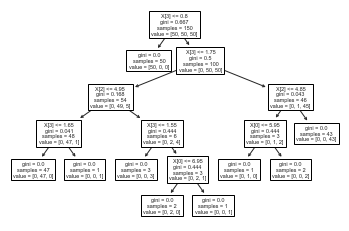

In [17]:
tree.plot_tree(model);

##### graphviz를 사용한 시각화

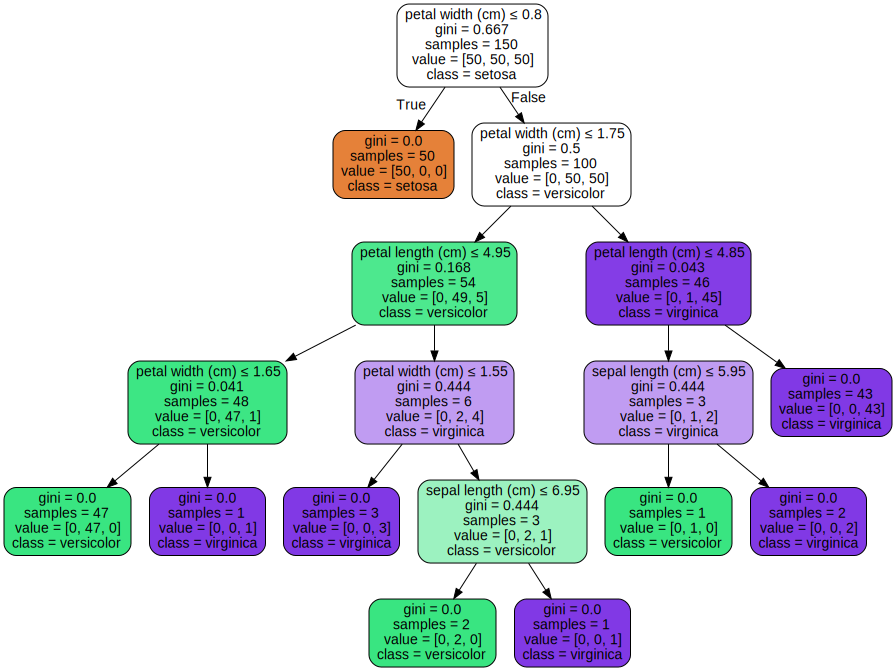

In [25]:
dot_data = tree.export_graphviz(decision_tree = model,
                                feature_names = iris.feature_names,
                                class_names = iris.target_names,
                                filled = True, rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

In [26]:
n_classes = 3
plot_colors = 'ryb'
plot_step = .02

##### 결정 경계 시각화

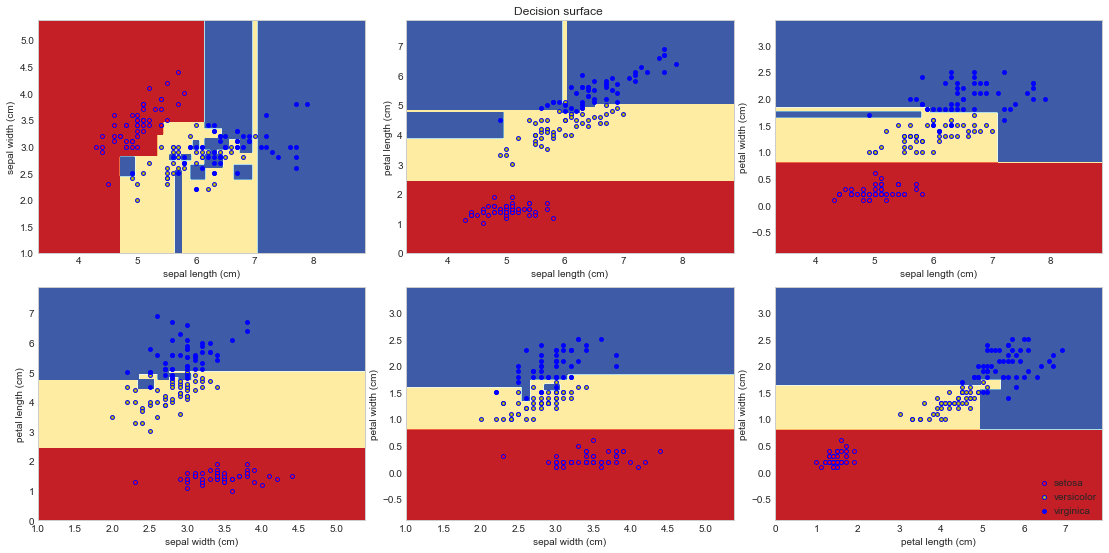

In [29]:
plt.figure(figsize = (16, 8))

for pairidx, pair in enumerate([[0,1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target
    
    model = DecisionTreeClassifier()
    model = model.fit(X, y)
    
    plt.subplot(2, 3, pairidx + 1)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad = .5, w_pad = .5, pad = 2.5)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap = plt.cm.RdYlBu)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c = color, label = iris.target_names[i],
                    cmap = plt.cm.RdYlBu, edgecolor = 'b', s = 15)
        
plt.suptitle('Decision surface')
plt.legend(loc = 'lower right', borderpad = 0, handletextpad = 0)
plt.axis('tight');

##### 하이퍼파리미터를 변경해 보면서 결정 경계의 변화 확인

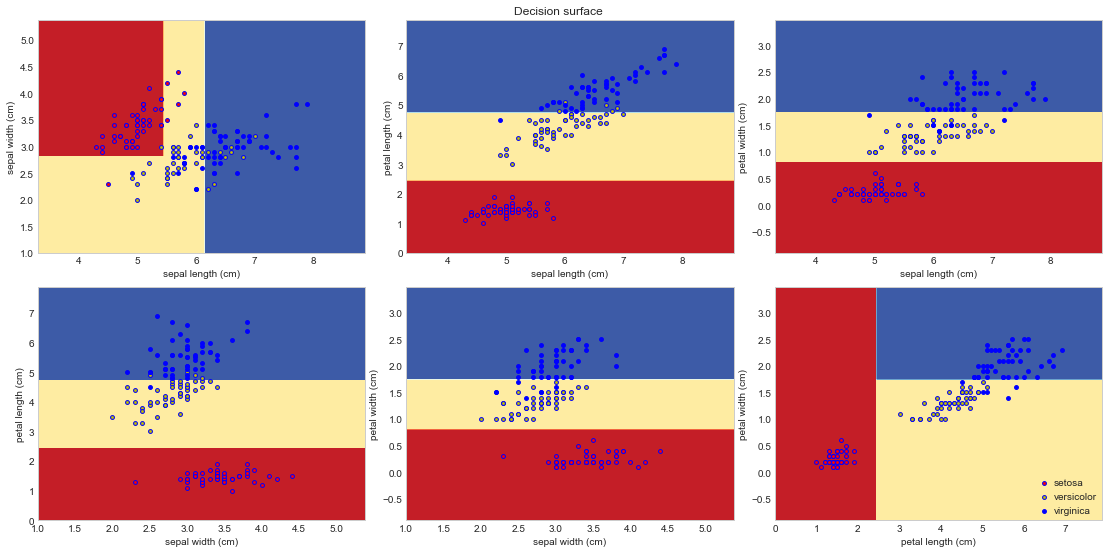

In [30]:
plt.figure(figsize = (16, 8))

for pairidx, pair in enumerate([[0,1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target
    
    model = DecisionTreeClassifier(max_depth = 2)
    model = model.fit(X, y)
    
    plt.subplot(2, 3, pairidx + 1)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad = .5, w_pad = .5, pad = 2.5)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap = plt.cm.RdYlBu)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c = color, label = iris.target_names[i],
                    cmap = plt.cm.RdYlBu, edgecolor = 'b', s = 15)
        
plt.suptitle('Decision surface')
plt.legend(loc = 'lower right', borderpad = 0, handletextpad = 0)
plt.axis('tight');

## 회귀 - `DecisionTreeRegressor()`

### 보스턴 주택 가격 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [31]:
model = DecisionTreeRegressor()

In [32]:
cross_val_score(
    estimator = model,
    X = boston.data, y = boston.target,
    cv = 5,
    n_jobs = multiprocessing.cpu_count()
)

array([ 0.63206333,  0.4348295 ,  0.59405388,  0.4033851 , -1.3708135 ])

##### 전처리 후 학습

In [33]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

In [34]:
cross_val_score(
    estimator = model,
    X = boston.data, y = boston.target,
    cv = 5,
    n_jobs = multiprocessing.cpu_count()
)

array([ 0.65248864,  0.41625905,  0.65389212,  0.36282136, -1.85907977])

#### 학습된 결정 트리 시각화

In [35]:
model = DecisionTreeRegressor()
model.fit(boston.data, boston.target)

DecisionTreeRegressor()

##### 텍스트를 통한 시각화

In [36]:
print(tree.export_text(model))

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- feature_0 <= 10.59
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_0 >  10.59
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  1.38
|   |   |   |--- feature_5 <= 6.54
|   |   |   |   |--- feature_12 <= 7.57
|   |   |   |   |   |--- feature_9 <= 222.50
|   |   |   |   |   |   |--- value: [28.70]
|   |   |   |   |   |--- feature_9 >  222.50
|   |   |   |   |   |   |--- feature_2 <= 5.48
|   |   |   |   |   |   |   |--- feature_10 <= 19.95
|   |   |   |   |   |   |   |   |--- feature_11 <= 393.33
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 3.90
|   |   |   |   |   |   |   |   |   |   |--- feature_11 <= 384.05
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_11 >  384.05
|   |   |   |   |   |   |   |   |   |   |   |--- value: [21.90]
|   |   |   |   |   |   |   |   |   |--- fe

##### plot_tree를 사용한 시각화

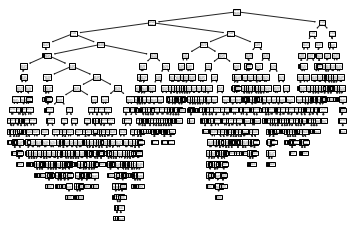

In [39]:
tree.plot_tree(model);

##### graphviz를 사용한 시각화

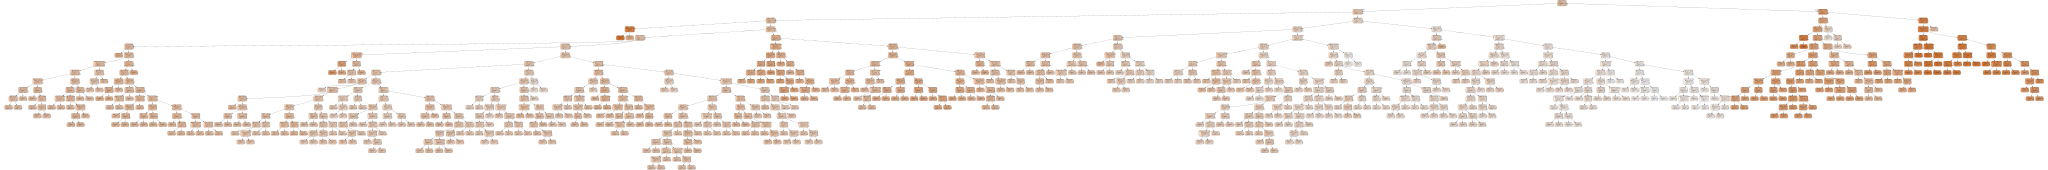

In [41]:
dot_data = tree.export_graphviz(decision_tree = model,
                                feature_names = boston.feature_names,
                                filled = True, rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

##### 회귀식 시각화

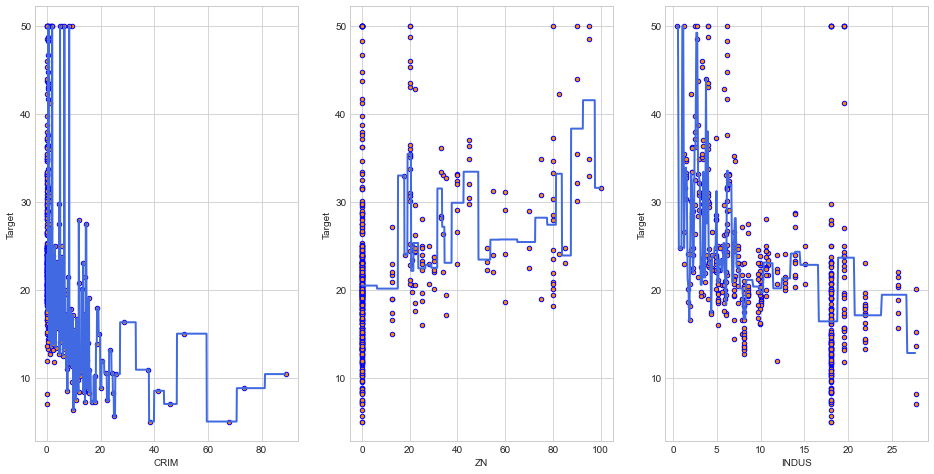

In [44]:
plt.figure(figsize = (16, 8))

for pairidx, pair in enumerate([0, 1, 2]):
    X = boston.data[:, pair].reshape(-1, 1)
    y = boston.target
    
    model = DecisionTreeRegressor()
    model.fit(X, y)
    
    X_test = np.arange(min(X), max(X), .1)[:, np.newaxis]
    predict = model.predict(X_test)
    
    plt.subplot(1, 3, pairidx + 1)
    plt.scatter(X, y, s = 20, edgecolors = 'b',
               c = 'darkorange', label = 'data')
    plt.plot(X_test, predict, color = 'royalblue', linewidth = 2)
    plt.xlabel(boston.feature_names[pair])
    plt.ylabel('Target')

##### 하이퍼파리미터를 변경해 보면서 회귀식 시각화

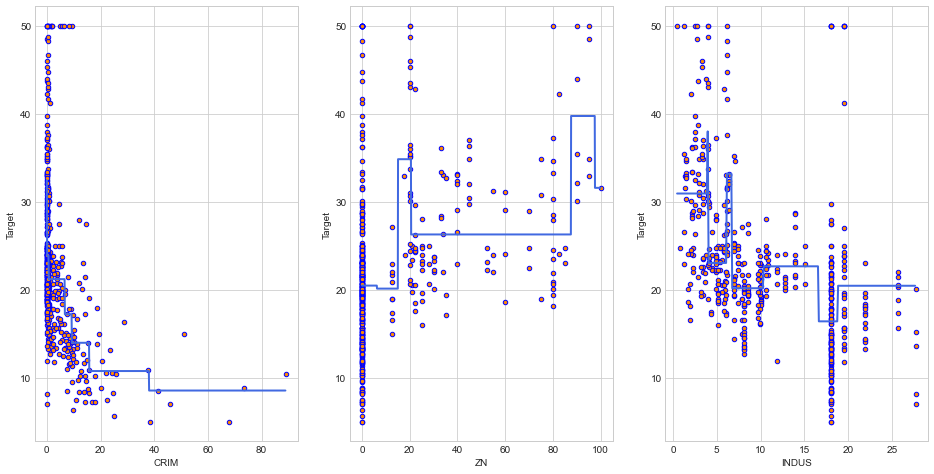

In [45]:
plt.figure(figsize = (16, 8))

for pairidx, pair in enumerate([0, 1, 2]):
    X = boston.data[:, pair].reshape(-1, 1)
    y = boston.target
    
    model = DecisionTreeRegressor(max_depth = 3)
    model.fit(X, y)
    
    X_test = np.arange(min(X), max(X), .1)[:, np.newaxis]
    predict = model.predict(X_test)
    
    plt.subplot(1, 3, pairidx + 1)
    plt.scatter(X, y, s = 20, edgecolors = 'b',
               c = 'darkorange', label = 'data')
    plt.plot(X_test, predict, color = 'royalblue', linewidth = 2)
    plt.xlabel(boston.feature_names[pair])
    plt.ylabel('Target')